
# Similarity Joins Tutorial

In this notebook we present the pyJedAI approach in the well-known ABT-BUY dataset using a Similarity Join workflow.


![workflow2-cora.png](https://github.com/AI-team-UoA/pyJedAI/blob/main/docs/img/workflow2-cora.png?raw=true)


## How to install?

pyJedAI is an open-source library that can be installed from PyPI.

For more: [pypi.org/project/pyjedai/](https://pypi.org/project/pyjedai/)

In [1]:
!python --version

Python 3.8.17


In [2]:
!pip install pyjedai -U

In [3]:
!pip show pyjedai

Name: pyjedai
Version: 0.1.0
Summary: An open-source library that builds powerful end-to-end Entity Resolution workflows.
Home-page: 
Author: 
Author-email: Konstantinos Nikoletos <nikoletos.kon@gmail.com>, George Papadakis <gpapadis84@gmail.com>, Jakub Maciejewski <jacobb.maciejewski@gmail.com>, Manolis Koubarakis <koubarak@di.uoa.gr>
License: Apache Software License 2.0
Location: /home/jm/anaconda3/envs/pyjedai-new/lib/python3.8/site-packages
Requires: faiss-cpu, gensim, matplotlib, matplotlib-inline, networkx, nltk, numpy, optuna, ordered-set, pandas, pandas-profiling, pandocfilters, plotly, py-stringmatching, PyYAML, rdflib, rdfpandas, regex, scipy, seaborn, sentence-transformers, strsim, strsimpy, tomli, tqdm, transformers, valentine
Required-by: 


Imports

In [4]:
import os
import sys
import pandas as pd
import networkx
from networkx import draw, Graph

from pyjedai.utils import print_clusters, print_blocks, print_candidate_pairs
from pyjedai.evaluation import Evaluation

[nltk_data] Downloading package stopwords to /home/jm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading the dataset

pyJedAI in order to perfrom needs only the tranformation of the initial data into a pandas DataFrame. Hence, pyJedAI can function in every structured or semi-structured data. In this case Abt-Buy dataset is provided as .csv files. 

<div align="center">
    <img align="center" src="https://github.com/AI-team-UoA/pyJedAI/blob/main/docs/img/reading-process.png?raw=true" width="800" />
</div>


### pyjedai <Data\> module

Data module offers a numpber of options
- Selecting the parameters (columns) of the dataframe, in D1 (and in D2)
- Prints a detailed text analysis
- Stores a hidden mapping of the ids, and creates it if not exists.

In [5]:
from pyjedai.datamodel import Data

d1 = pd.read_csv("./../data/der/cora/cora.csv", sep='|')
gt = pd.read_csv("./../data/der/cora/cora_gt.csv", sep='|', header=None)
attr = ['Entity Id','author', 'title']

Data is the connecting module of all steps of the workflow

In [6]:
data = Data(
    dataset_1=d1,
    id_column_name_1='Entity Id',
    ground_truth=gt,
    attributes_1=attr
)

## Similarity Joins

__Available algorithms:__

- EJoin
- TopKJoin

In [7]:
from pyjedai.joins import EJoin, TopKJoin

/home/jm/public-pyJedAI/pyJedAI/src/pyjedai/joins.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [8]:
join = EJoin(similarity_threshold = 0.5,
             metric = 'jaccard',
             tokenization = 'qgrams_multiset',
             qgrams = 2)

g = join.fit(data)

EJoin (jaccard):   0%|          | 0/2590 [00:00<?, ?it/s]

In [9]:
_ = join.evaluate(g)

***************************************************************************************************************************
                                         Μethod:  EJoin
***************************************************************************************************************************
Method name: EJoin
Parameters: 
	similarity_threshold: 0.5
	metric: jaccard
	tokenization: qgrams_multiset
	qgrams: 2
Runtime: 51.6994 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.80% 
	Recall:        93.03%
	F1-score:      77.08%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


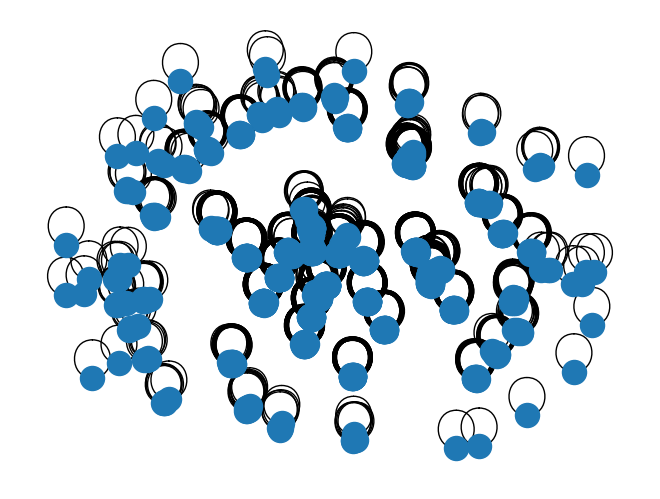

In [10]:
draw(g)

## Entity Clustering

It takes as input the similarity graph produced by Entity Matching and partitions it into a set of equivalence clusters, with every cluster corresponding to a distinct real-world object.

In [11]:
from pyjedai.clustering import ConnectedComponentsClustering

In [12]:
ec = ConnectedComponentsClustering()
clusters = ec.process(g, data, similarity_threshold=0.3)

In [13]:
_ = ec.evaluate(clusters)

***************************************************************************************************************************
                                         Μethod:  Connected Components Clustering
***************************************************************************************************************************
Method name: Connected Components Clustering
Parameters: 
Runtime: 0.3853 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     48.42% 
	Recall:        93.19%
	F1-score:      63.73%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


<hr>
<div align="right">
K. Nikoletos, J. Maciejewski, G. Papadakis & M. Koubarakis
</div>
<div align="right">
<a href="https://github.com/Nikoletos-K/pyJedAI/blob/main/LICENSE">Apache License 2.0</a>
</div>